# The Titanic Dataset

Let's see what we can find on this dataset and prepare out data for ML Algorithms

In [1]:
# Importing necessary libraries

import pandas as pd
from pathlib import Path as path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration loading

In [2]:
import yaml

def get_config(config_file_path:path=path('../../config.yml')):# -> dict:
    with open(config_file_path) as config_file:
        config = yaml.safe_load(config_file)
    return config

settings = get_config()
dataset_path = settings['paths']['dataset_path']['titanic']
print(dataset_path)

~/datasets/kaggle/titanic


### Setting Plot Defaults

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

### Loading the dataset & quick inspection

In [4]:
train_df = pd.read_csv(path(dataset_path,'train.csv').expanduser())
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Update data types

In [7]:
train_df = train_df.assign(PassengerId = train_df['PassengerId'].astype(np.int16),
                           Survived = train_df['Survived'].astype(np.int8),
                           Pclass = train_df['Pclass'].astype(np.uint8),
                           SibSp = train_df['SibSp'].astype(np.uint8),
                           Parch = train_df['Parch'].astype(np.uint8),
                           Fare = train_df['Fare'].astype(np.float32),
                           )

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int16  
 1   Survived     891 non-null    int8   
 2   Pclass       891 non-null    uint8  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    uint8  
 7   Parch        891 non-null    uint8  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float32
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float32(1), float64(1), int16(1), int8(1), object(5), uint8(3)
memory usage: 50.6+ KB


In [8]:
train_df['Cabin'].nunique()

147

Missing values counts

In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dataframe histograms

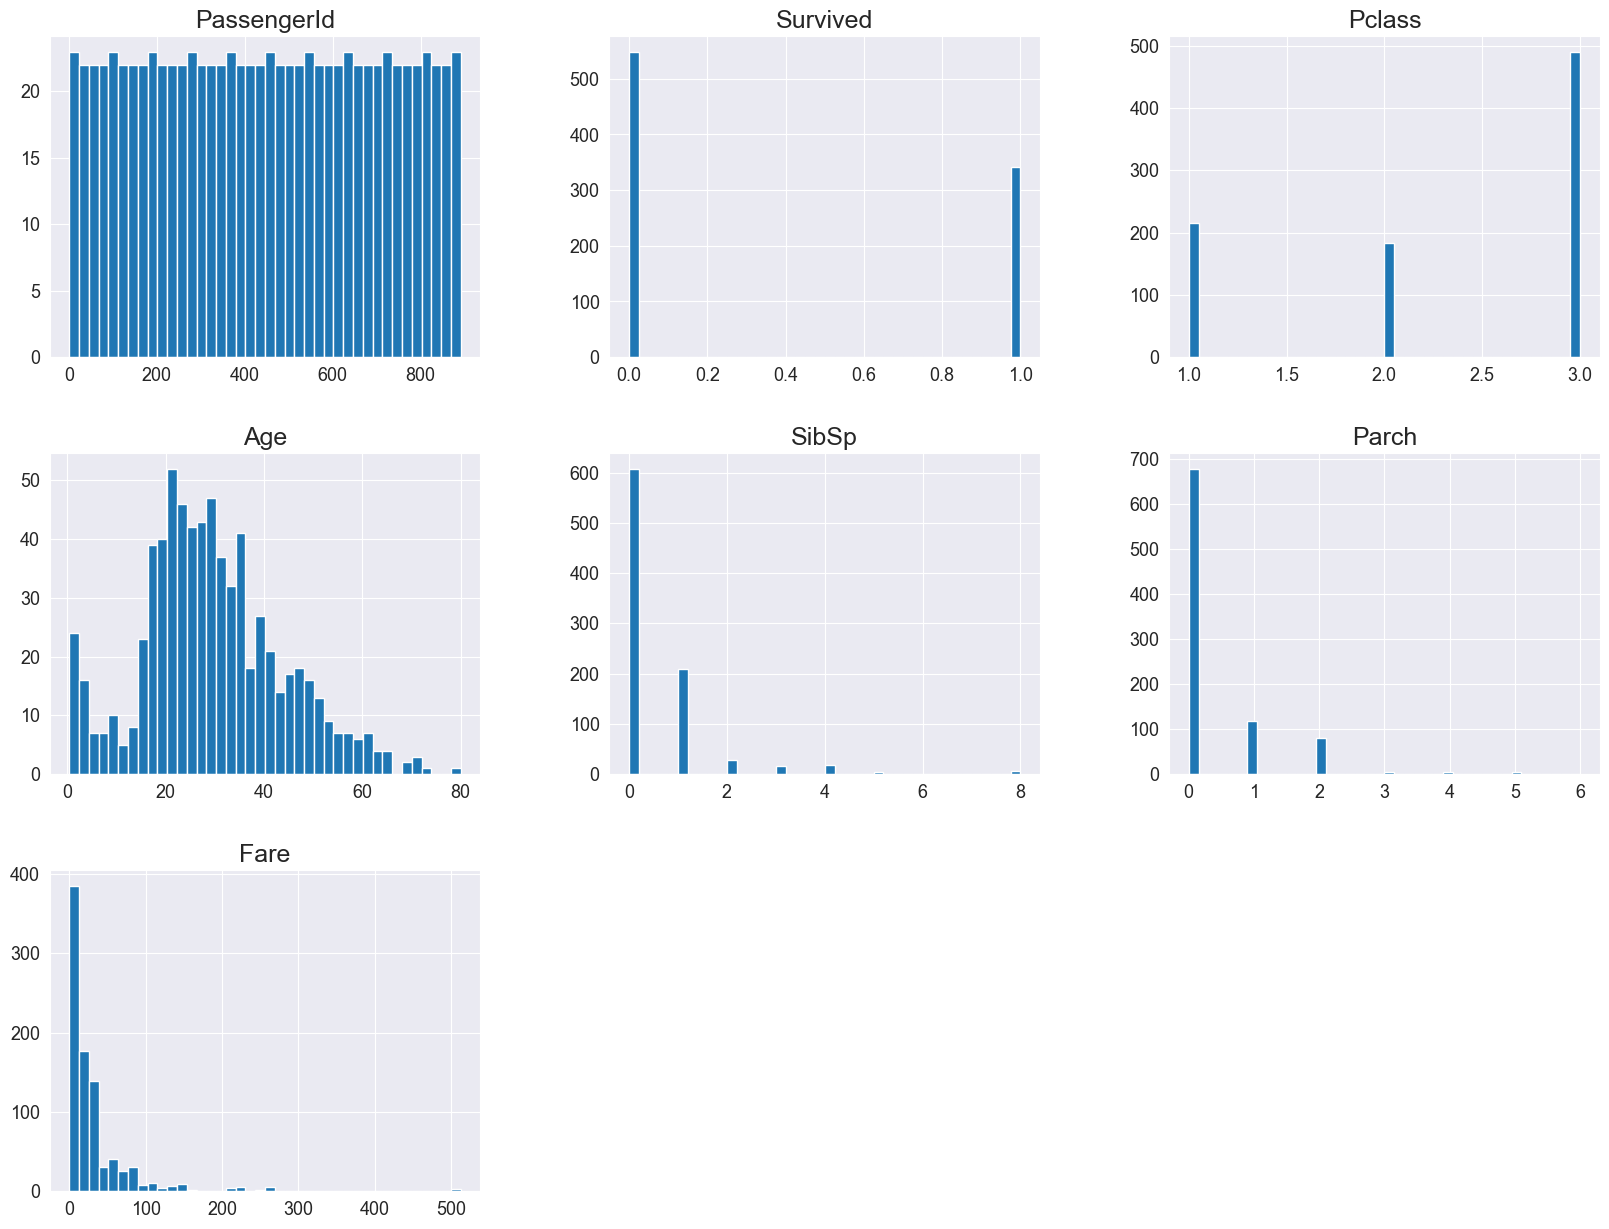

In [10]:
train_df.hist(bins=40, figsize=(20,15))
plt.savefig('df_hist')

Pandas scatterplot

Text(0.5, 0.98, 'Scatter Matrix of Numerical Features')

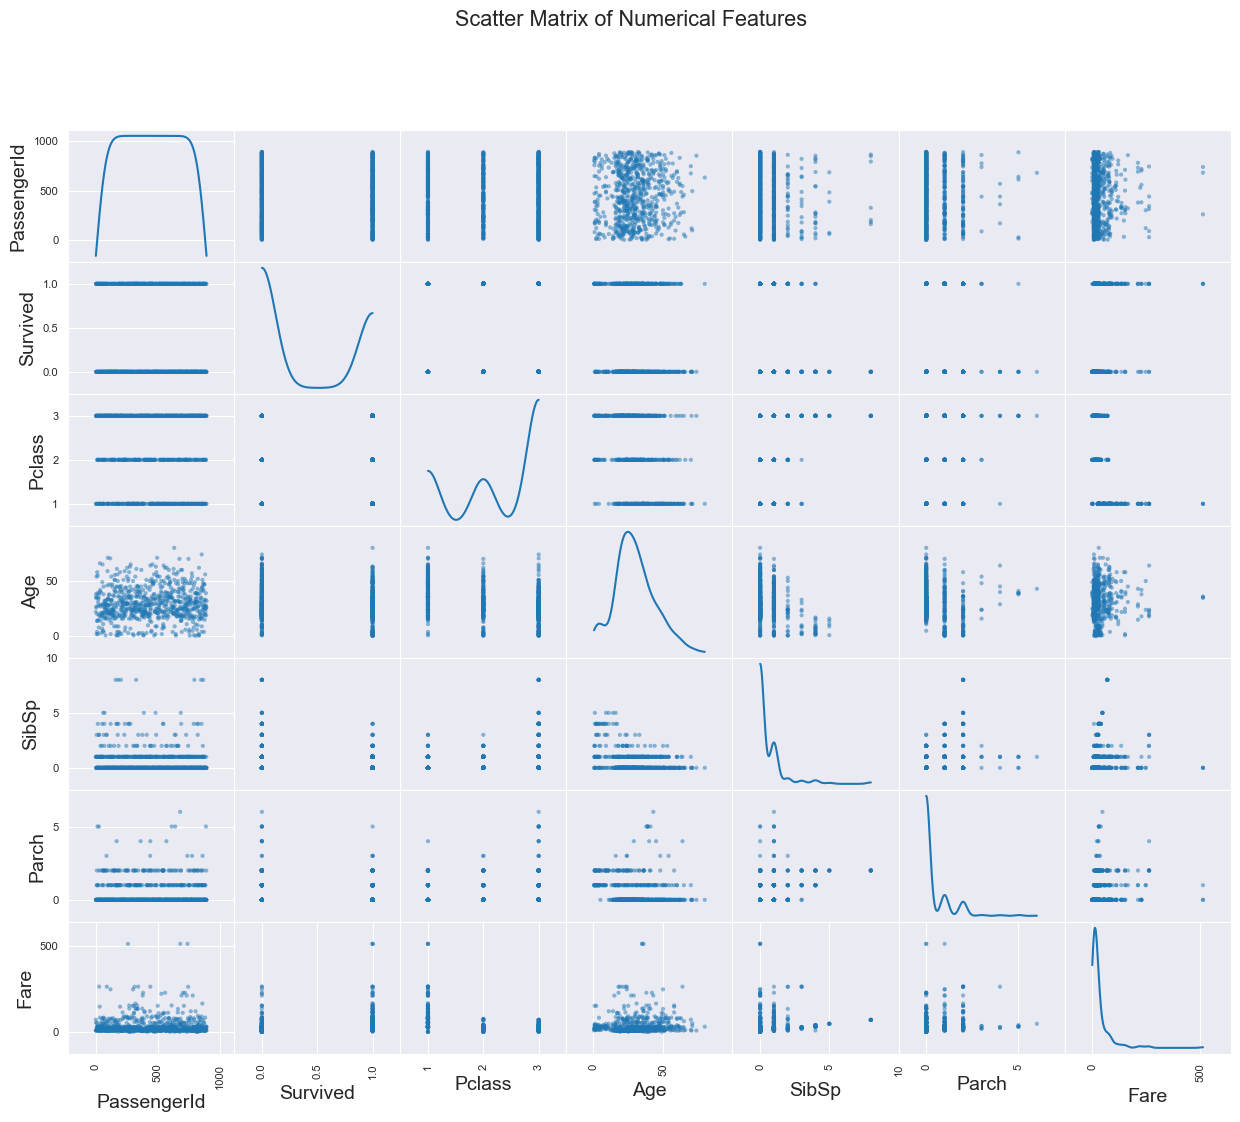

In [11]:
from pandas.plotting import scatter_matrix

numerical_attrs = (train_df.select_dtypes(exclude=['object','bool'])
                   .columns.to_list())

scatter_matrix(train_df[numerical_attrs], figsize=(15,12), diagonal='kde', hist_kwds={'bins':10,'alpha':0.3}, range_padding=0.5)
plt.suptitle('Scatter Matrix of Numerical Features')

Correlation heatmap

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


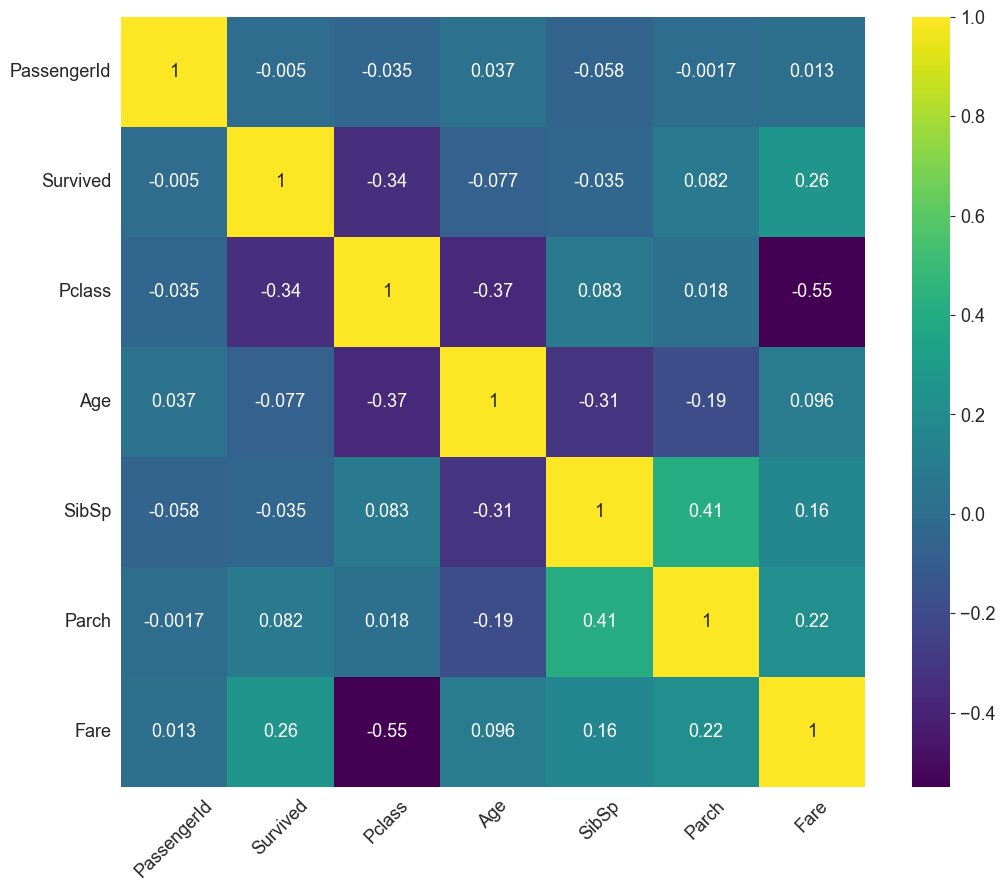

In [12]:
heatmap_data = train_df.corr(numeric_only=True)

print(heatmap_data['Survived'])

names = heatmap_data.columns.to_list()

fig,ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(heatmap_data,cbar_kws={"orientation": "vertical"},cmap='viridis', annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
plt.savefig('correlation_heatmap.png')

PClass vs Age - who survived

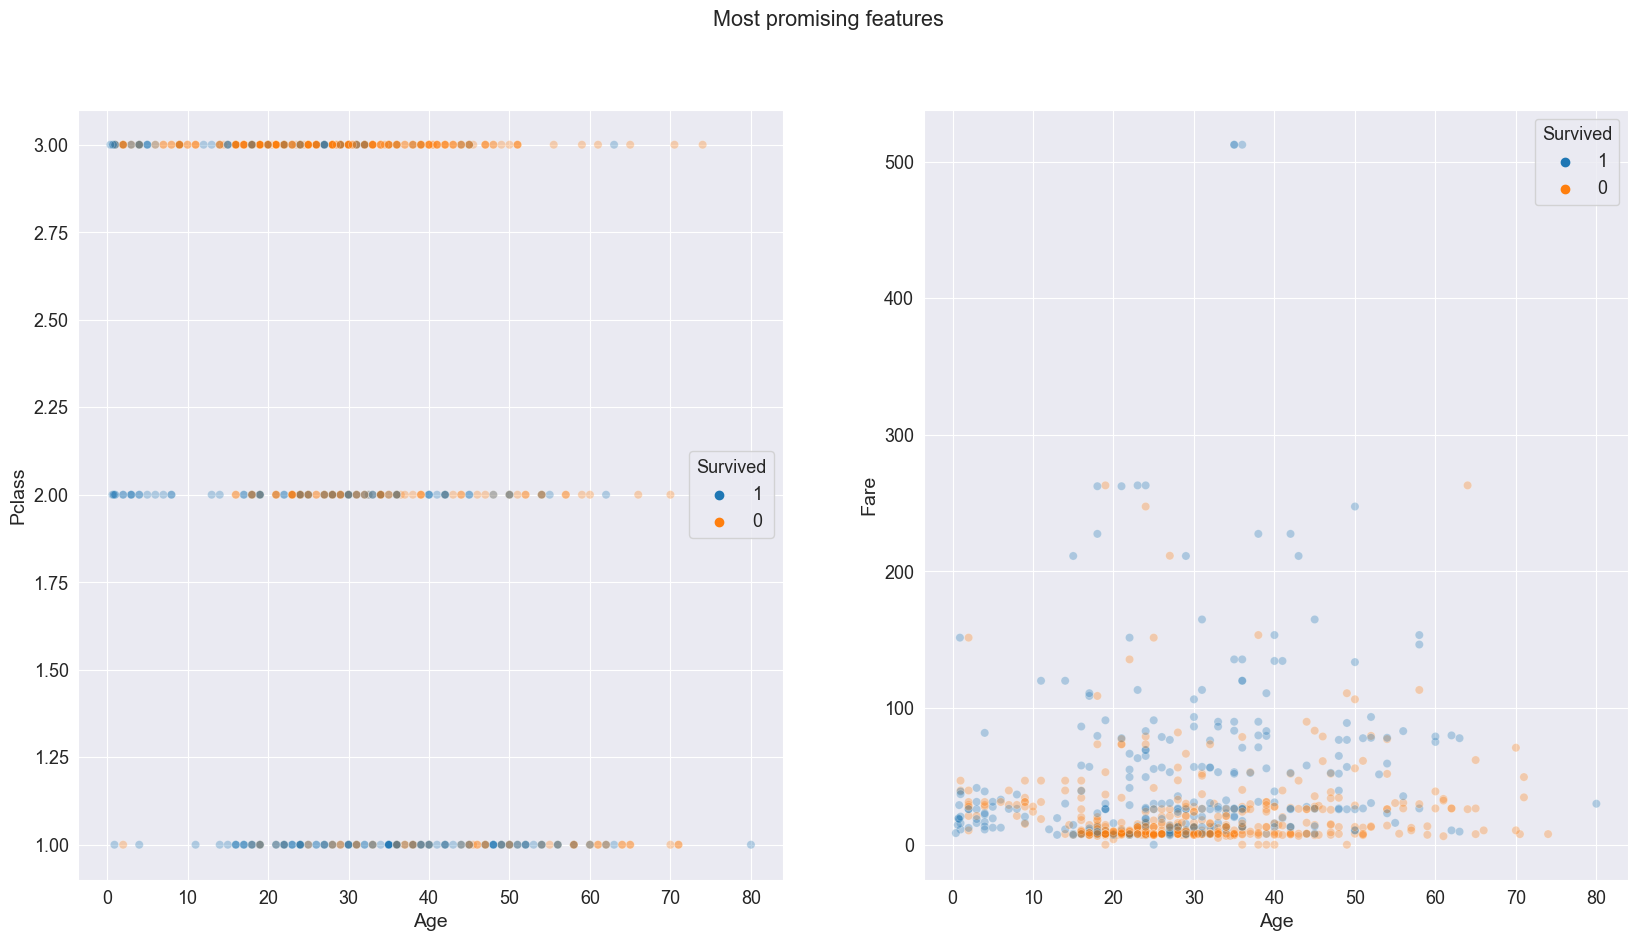

In [13]:
fig,axs = plt.subplots(figsize=(20,10), ncols=2)

sns.scatterplot(y=train_df['Pclass'], 
                x=train_df['Age'],
                hue=train_df['Survived'],
                hue_order=[1,0],
                alpha=0.3,
                ax=axs[0]
                )

sns.scatterplot(y=train_df['Fare'], 
                x=train_df['Age'],
                hue=train_df['Survived'],
                hue_order=[1,0],
                alpha=0.3,
                ax=axs[1]
                )

plt.suptitle('Most promising features')
plt.savefig('promising_features.png')

In [14]:
fig,axs = plt.subplots(figsize=(24,10), nrows=2, ncols=3, sharey=True, tight_layout=True, dpi=750)

for idx_row,row in enumerate(axs):
    for idx_column,col in enumerate(row):
        if idx_row==0:
            sns.histplot(data=train_df[train_df['Pclass']==idx_column+1],
                         x='Survived',
                         stat='count',
                         discrete=True,
                         palette='deep',
                         ax=axs[idx_row,idx_column],
                         hue='Survived',
                         alpha=1
                         )
            
            axs[idx_row,idx_column].set(title=f'Class {idx_column+1} Survived vs Deceased',
                                        xticks = np.arange(0,2,1),
                                        ylabel = 'Passenger count',
                                        )
            
        if idx_row==1:
            sns.histplot(data=train_df[train_df['Pclass']==idx_column+1],
                         x='Survived',
                         stat='count',
                         discrete=True,
                         palette='deep',
                         ax=axs[idx_row,idx_column],
                         hue='Sex',
                         multiple='dodge',
                         shrink=0.7,
                         alpha=1
                         )
            
            axs[idx_row,idx_column].set(title=f'Class {idx_column+1} Survived vs Deceased',
                                        xticks = np.arange(0,2,1),
                                        ylabel = 'Passenger count',
                                        )

filename = "PClass_Graphs.png"
overwrite = False

if path(filename).exists() and overwrite:
    fig.savefig(filename)
plt.show()

Preprocessing

In [15]:
train_df.dtypes

PassengerId      int16
Survived          int8
Pclass           uint8
Name            object
Sex             object
Age            float64
SibSp            uint8
Parch            uint8
Ticket          object
Fare           float32
Cabin           object
Embarked        object
dtype: object

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

train_df_reduced = train_df.drop(['Name','Ticket','Cabin','Embarked','PassengerId'], axis=1)
num_attribs = train_df_reduced.select_dtypes(exclude='object').columns
cat_attribs = train_df_reduced.select_dtypes(include='object').columns

print(train_df[num_attribs].head())
print(train_df[cat_attribs].head())
print('\n',train_df[num_attribs].isna().sum())


   Survived  Pclass   Age  SibSp  Parch       Fare
0         0       3  22.0      1      0   7.250000
1         1       1  38.0      1      0  71.283302
2         1       3  26.0      0      0   7.925000
3         1       1  35.0      1      0  53.099998
4         0       3  35.0      0      0   8.050000
      Sex
0    male
1  female
2  female
3  female
4    male

 Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [17]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipe = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

train_df_prepared = full_pipe.fit_transform(train_df)

In [18]:
train_df_prepared

array([[-0.78927234,  0.82737724, -0.56573646, ..., -0.50244517,
         0.        ,  1.        ],
       [ 1.2669898 , -1.56610693,  0.66386103, ...,  0.78684533,
         1.        ,  0.        ],
       [ 1.2669898 ,  0.82737724, -0.25833709, ..., -0.48885425,
         1.        ,  0.        ],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , ..., -0.17626322,
         1.        ,  0.        ],
       [ 1.2669898 , -1.56610693, -0.25833709, ..., -0.04438104,
         0.        ,  1.        ],
       [-0.78927234,  0.82737724,  0.20276197, ..., -0.49237782,
         0.        ,  1.        ]])

### Train a model

In [19]:
train_df_prepared.shape

(891, 8)